In [18]:
!pip install -U -q PyDrive

In [19]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [20]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# New Section

In [21]:
link='https://drive.google.com/file/d/14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV/view?usp=sharing'

In [25]:
fluff, id = link.split('=')
id = '14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV'
print (id) # Verify that you have everything after '='

14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV


In [26]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('corona_tweets_01.csv')  
dataframe=pd.read_csv("corona_tweets_01.csv", header=None)

In [27]:
dataframe=pd.DataFrame(dataframe[0])

In [28]:
dataframe.to_csv("ready_corona_tweets_01.txt", index=False, header=None)
dataframe

,0
0,1240727808080412673
1,1240727808005079041
2,1240727808340414464
3,1240727808629813248
4,1240727808617230336
...,...
831322,1240861453524930562
831323,1240861453554315265
831324,1240861453503959043
831325,1240861453311070209


In [29]:
pip install twarc

In [30]:
accesstoken='1427751738-lXHLG1ocIx0K83p5OKuqfmfnbtugZn4n1S1GzA7'
accesstokenkey='EcTbXH6bYC2nJEyZGXEakfJiPcFixdS2i4txSYx2cXE0f'
apikey='6iaCc1iamER8NdvOCApHMN7Io'
apisecretkey='qKZ7jnoHFYzhZdgxku1dWAAgTQfUhvMOK40x4L0yy98BRPwYow'

In [31]:
from twarc import Twarc

In [32]:
t = Twarc(apikey, apisecretkey, accesstoken, accesstokenkey)

In [33]:
list_tweets=[]
for x,tweet in enumerate(t.hydrate(open('ready_corona_tweets_01.txt'))):
  if(x==100):
    break;
  list_tweets.append(tweet['full_text'])

In [34]:
list_tweets

['Wuhan has been in complete quarantine for over 8 weeks. \n\nPeople here are still going about their daily lives as normal. \n\nThis is pure fantasy. https://t.co/AUZbGNRDjM',
 'RT @chandlerriggs: here’s a deleted scene from TWD’s special on corona virus https://t.co/qGuSfyjpK5',
 "RT @RedTRaccoon: You can no longer defend this.\n\nMake up any excuse or reasoning you want, it's intentional and it's racist.",
 'Pretty much any corona virus germ that wants to or has entered my body these passed hours are all being bodied by these shots of henny https://t.co/HLsSEnRksu',
 'RT @RealSaavedra: Good.\n\nIt came from China.',
 'RT @nicolebyer: Everyone in this looks sick',
 'RT @jabinbotsford: Close up of President @realDonaldTrump notes is seen where he crossed out "Corona" and replaced it with "Chinese" Virus…',
 'RT @Biancaixvi: Corona day 3: it just feels like Sunday again and...again',
 'RT @FernandoAmandi: China’s irresponsible and criminal behavior in the wake of COVID-19 will leave it

In [35]:
# Create a function to clean the tweets
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text.encode('ascii', 'ignore').decode('ascii')
    return regrex_pattern.sub(r'',text)

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n', '', text) #REmoving Marks
 text = re.sub(':', '', text) #REmoving Marks
 text = re.sub('_', '', text) #REmoving Marks
 
 text=deEmojify(text)
 return text



list_tweets=list(map(cleanTxt,list_tweets))

In [44]:
list_tweets_final=[]
for x,tweet in enumerate(t.hydrate(open('ready_corona_tweets_01.txt'))):
  list_tweets_final.append(tweet['full_text'])
  

  

ERROR:twarc:caught connection error ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')) on 1 try


KeyboardInterrupt: ignored

In [45]:
list_tweets_final=list(map(cleanTxt,list_tweets_final))

In [46]:
print (len (list_tweets_final))

82468


In [47]:
data_tweets=pd.DataFrame(list_tweets_final,columns=["Tweets"])

In [48]:
data_tweets.head()

,Tweets
0,Wuhan has been in complete quarantine for over...
1,here’s a deleted scene from TWD’s special on ...
2,You can no longer defend this.Make up any exc...
3,Pretty much any corona virus germ that wants t...
4,Good.It came from China.


In [49]:
data_tweets.to_csv("data_1.csv", index=False, header=None)

In [50]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data_tweets['Subjectivity'] = data_tweets['Tweets'].apply(getSubjectivity)
data_tweets['Polarity'] = data_tweets['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data_tweets


,Tweets,Subjectivity,Polarity
0,Wuhan has been in complete quarantine for over...,0.387500,0.116071
1,here’s a deleted scene from TWD’s special on ...,0.571429,0.357143
2,You can no longer defend this.Make up any exc...,0.050000,-0.050000
3,Pretty much any corona virus germ that wants t...,0.433333,0.216667
4,Good.It came from China.,0.000000,0.000000
...,...,...,...
82463,Great shot . A picture is worth . . .,0.425000,0.550000
82464,Lol what a douchebag,0.700000,0.800000
82465,This is for CORONA you big fat white nasty s...,0.366667,-0.333333
82466,Day 5 We have rediscovered farming,0.000000,0.000000


In [52]:
reviews = np.array(data_tweets['Tweets'])


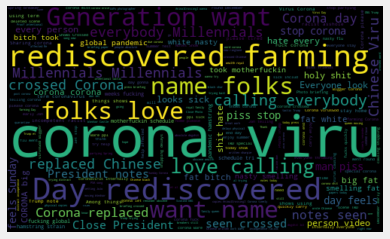

In [53]:
# word cloud visualization
allWords = ' '.join([twts for twts in data_tweets['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data_tweets['Analysis'] = data_tweets['Polarity'].apply(getAnalysis)
# Show the dataframe
data_tweets


,Tweets,Subjectivity,Polarity,Analysis
0,Wuhan has been in complete quarantine for over...,0.387500,0.116071,Positive
1,here’s a deleted scene from TWD’s special on ...,0.571429,0.357143,Positive
2,You can no longer defend this.Make up any exc...,0.050000,-0.050000,Negative
3,Pretty much any corona virus germ that wants t...,0.433333,0.216667,Positive
4,Good.It came from China.,0.000000,0.000000,Neutral
...,...,...,...,...
82463,Great shot . A picture is worth . . .,0.425000,0.550000,Positive
82464,Lol what a douchebag,0.700000,0.800000,Positive
82465,This is for CORONA you big fat white nasty s...,0.366667,-0.333333,Negative
82466,Day 5 We have rediscovered farming,0.000000,0.000000,Neutral


In [55]:
labels=np.array(data_tweets['Analysis'])


In [56]:
data_tweets['Tweets'].loc[1]



' here’s a deleted scene from TWD’s special on corona virus '

In [57]:
data_tweets['Analysis'].loc[1]

'Positive'

KeyboardInterrupt: ignored

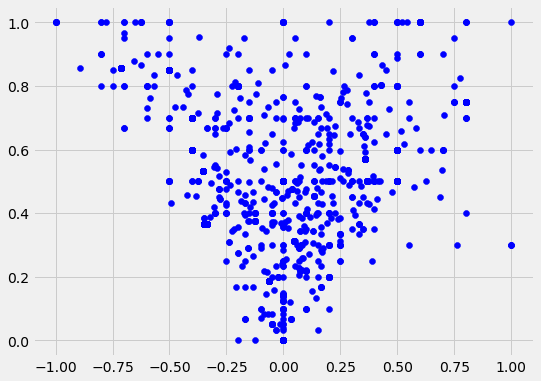

In [58]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, data_tweets.shape[0]):
  plt.scatter(data_tweets["Polarity"][i], data_tweets["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [59]:
# Print the percentage of positive tweets
ptweets = data_tweets[data_tweets.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / data_tweets.shape[0]) * 100 , 1)

26.8

In [60]:
# Print the percentage of negative tweets
ntweets = data_tweets[data_tweets.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / data_tweets.shape[0]) * 100, 1)

25.1

In [61]:
# Show the value counts
data_tweets['Analysis'].value_counts()

Neutral     39591
Positive    22140
Negative    20737
Name: Analysis, dtype: int64

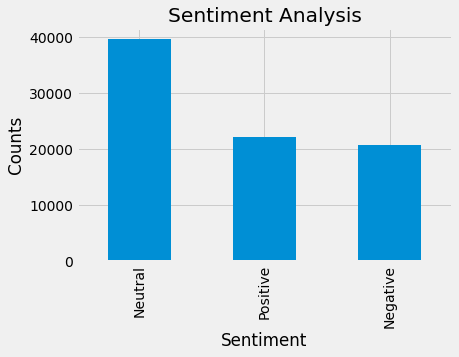

In [62]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data_tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [63]:
import numpy as np
import pandas as pd



In [64]:

#optional
punctuation = '!"#$%&\'()*+,-./:;<=>?[\\]^_`{|}~'
all_reviews = 'separator'.join(reviews)
all_reviews = all_reviews.lower()
all_text = ''.join([c for c in all_reviews if c not in punctuation])

reviews_split = all_text.split('separator')
all_text = ' '.join(reviews_split)
words = all_text.split()

new_reviews = []
for review in reviews_split:
    review = review.split()
    new_text = []
    for word in review:
        if (word[0] != '@') & ('http' not in word) & (~word.isdigit()):
            new_text.append(word)
    new_reviews.append(new_text)

In [65]:
from collections import Counter

Counter(labels)

Counter({'Negative': 20737, 'Neutral': 39591, 'Positive': 22140})

In [66]:
#dictionary mapping to integer
'''encoding'''
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in new_reviews:
    reviews_ints.append([vocab_to_int[word] for word in review])
    

In [67]:
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])

Unique words:  37935

Tokenized review: 
 [[425, 85, 147, 10, 1739, 269, 19, 149, 112, 60, 178, 20, 232, 163, 94, 132, 914, 745, 78, 1227, 4, 5, 3064, 12491]]


In [68]:
#labels encoding
encoded_labels = []
for label in labels:
    if label == 'Neutral':
        encoded_labels.append(1)
    elif label == 'Negative':
        encoded_labels.append(0)
    else:
        encoded_labels.append(1)

encoded_labels = np.asarray(encoded_labels)
print (encoded_labels)


[1 1 0 ... 0 1 0]


In [69]:
print(len (reviews_ints))


82468


In [70]:
arr=np.array(reviews_ints)
print (arr)


[list([425, 85, 147, 10, 1739, 269, 19, 149, 112, 60, 178, 20, 232, 163, 94, 132, 914, 745, 78, 1227, 4, 5, 3064, 12491])
 list([231, 9, 237, 235, 23, 239, 220, 21, 1, 12])
 list([15, 50, 98, 467, 537, 566, 35, 180, 462, 110, 561, 15, 37, 118, 228, 6, 118, 97])
 ...
 list([4, 5, 19, 1, 15, 121, 79, 116, 101, 137, 79, 123, 84, 15, 129, 33, 83, 2, 138, 135, 17, 59, 140])
 list([18, 11, 16, 30, 29])
 list([8, 365, 4, 1, 70, 3440, 149, 211, 6328, 866])]


In [71]:
print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

Number of reviews before removing outliers:  82468
Number of reviews after removing outliers:  82467


In [72]:
for i in range (100):


  print( (reviews_ints[i]))

[425, 85, 147, 10, 1739, 269, 19, 149, 112, 60, 178, 20, 232, 163, 94, 132, 914, 745, 78, 1227, 4, 5, 3064, 12491]
[231, 9, 237, 235, 23, 239, 220, 21, 1, 12]
[15, 50, 98, 467, 537, 566, 35, 180, 462, 110, 561, 15, 37, 118, 228, 6, 118, 97]
[1268, 311, 180, 1, 12, 6899, 14, 562, 3, 110, 85, 4223, 26, 419, 141, 1792, 734, 20, 58, 213, 17309, 111, 141, 2599, 7, 12492]
[1046, 479, 23, 162]
[42, 10, 4, 103, 73]
[62, 35, 7, 61, 40, 5, 68, 63, 24, 36, 22, 1, 6, 57, 13, 17, 34, 71]
[1, 18, 13, 27, 87, 31, 81, 75, 90]
[1849, 1417, 6, 902, 1168, 10, 2, 1228, 7, 155, 80, 574, 13, 10, 118, 1462, 125, 1793, 10, 2208]
[567, 497, 249, 217, 122, 314, 1278, 299, 2, 254, 226, 4, 1, 12, 448, 16, 942, 1418]
[106, 47, 9, 101, 167, 14, 181, 230, 10, 221, 202, 206, 99, 201, 15, 14, 47, 1, 218, 184, 127, 73, 233]
[1, 18, 13, 27, 87, 31, 81, 75, 90]
[573, 428, 9, 3705, 666, 19, 3706, 6, 3455, 19, 672, 870, 926, 111, 1, 262, 428, 77, 3456]
[12493, 2, 1, 5, 281, 871, 45, 168, 278, 3, 2, 451, 1359]
[664, 693, 5,

In [73]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [74]:
seq_length = 20

features = pad_features(reviews_ints, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features[:30,:10])

[[  425    85   147    10  1739   269    19   149   112    60]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0    15    50    98   467   537   566    35   180]
 [ 1268   311   180     1    12  6899    14   562     3   110]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0    62    35     7    61    40     5    68    63]
 [    0     0     0     0     0     0     0     0     0     0]
 [ 1849  1417     6   902  1168    10     2  1228     7   155]
 [    0     0   567   497   249   217   122   314  1278   299]
 [  106    47     9   101   167    14   181   230    10   221]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0   573   428     9  3705   666    19  3706     6  3455]
 [    0     0     0     0     0     0     0 12493     2     1]
 [    0     0     0   664   693     5   602    10     2   652]
 [  212   151   165    76     4   102     5   189   173

In [75]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(65973, 20) 
Validation set: 	(8247, 20) 
Test set: 		(8247, 20)


In [76]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,drop_last=True)

In [77]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 20])
Sample input: 
 tensor([[    0,     0,     0,     4,     5,    52,    54,     8,    37,     3,
            43,    14,    28,    53,    41,    44,    49,     6,    46,    56],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,    70,     8,   601,   191,    94,    14],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   133,     1,     8,   247,    26,   241],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     4,    97,   133,   149,   178],
        [   21,   541,    60,    10,   864,    80,    38,  7506,    10,     2,
          3699,   146,   326,  7507,    78,     2,   254,     5,   213, 11445],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     4,    88,    86,    66,    5

In [78]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [79]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [80]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(37936, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [81]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [82]:
epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())
                

                val_losses.append(val_loss.item())
                

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/3... Step: 100... Loss: 0.315559... Val Loss: 0.243885
Epoch: 1/3... Step: 200... Loss: 0.248187... Val Loss: 0.216228
Epoch: 1/3... Step: 300... Loss: 0.075219... Val Loss: 0.181063
Epoch: 1/3... Step: 400... Loss: 0.121231... Val Loss: 0.172986
Epoch: 1/3... Step: 500... Loss: 0.056832... Val Loss: 0.155511
Epoch: 1/3... Step: 600... Loss: 0.220556... Val Loss: 0.148220
Epoch: 1/3... Step: 700... Loss: 0.093756... Val Loss: 0.140262
Epoch: 1/3... Step: 800... Loss: 0.121127... Val Loss: 0.137542
Epoch: 1/3... Step: 900... Loss: 0.062822... Val Loss: 0.129181
Epoch: 1/3... Step: 1000... Loss: 0.252006... Val Loss: 0.134116
Epoch: 1/3... Step: 1100... Loss: 0.039933... Val Loss: 0.123729
Epoch: 1/3... Step: 1200... Loss: 0.226315... Val Loss: 0.122959
Epoch: 1/3... Step: 1300... Loss: 0.094178... Val Loss: 0.120507
Epoch: 2/3... Step: 1400... Loss: 0.028953... Val Loss: 0.122670
Epoch: 2/3... Step: 1500... Loss: 0.039222... Val Loss: 0.138176
Epoch: 2/3... Step: 1600... Loss: 

In [83]:
test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.138
Test accuracy: 0.948


In [84]:
test_review_neg = 'corona makes me sick'

In [85]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review_neg)
print(test_ints)

[[1, 907, 33, 73]]


In [86]:
seq_length=20
features = pad_features(test_ints, seq_length)

print(features)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 907
   33  73]]


In [87]:
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())

torch.Size([1, 20])


In [88]:
def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

In [91]:
test_review_neg = 'corona is fuck '
pos_review=' there is complete quarantine facility at india'
seq_length=20
predict(net, test_review_neg, seq_length)
predict(net,pos_review,seq_length)

Prediction value, pre-rounding: 0.018094
Negative review detected.
Prediction value, pre-rounding: 0.999964
Positive review detected!


(-0.020150963007472458, 0.8)

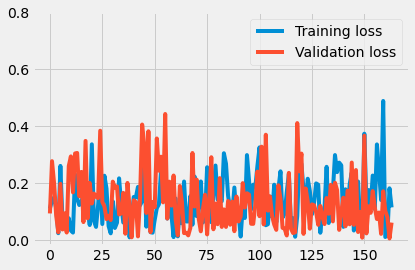

In [92]:
plt.plot(test_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
ax = plt.gca()
ax.grid(True)
plt.legend()
plt.ylim(ymax=0.8)